<a href="https://colab.research.google.com/github/JamieBali/MRSCC/blob/main/ANLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERT Pre-Trained Model

The BERT pre-trained model is a bi-directional and fully-interconnected neural model that can be used for both generation and sentence completion. 

In [ ]:
!pip install Transformers

In [ ]:
import pandas as pd, csv
import os
import nltk
from nltk.corpus import wordnet as wn

In [ ]:
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM

# Load pre-trained models
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
def make_segment_ids(list_of_tokens):
  #this function assumes that up to and including the first '[SEP]' is the first segment, anything afterwards is the second segment
  current_id=0
  segment_ids=[]
  for token in list_of_tokens:
    segment_ids.append(current_id)
  return torch.tensor([segment_ids])

def tokeniseText(question):
  masked_index = 0 
  tokenized = ["[CLS]"] + tokenizer.tokenize(question)
  temp = []
  for i, word in enumerate(tokenized):
    if word == "_" and tokenized[i+4] == "_":
      masked_index = i
      temp.append("[MASK]")
    elif word == "_":
      pass
    else:
      temp.append(word)
  temp.append("[SEP]")


  segment_ids=make_segment_ids(temp)
  return torch.tensor([tokenizer.convert_tokens_to_ids(temp)]), masked_index, segment_ids

In [ ]:
def predict(input_sentence):
  tokens_tensor, masked_index, segment_ids = tokeniseText(input_sentence)
  
  model = BertForMaskedLM.from_pretrained('bert-base-uncased')
  model.eval()

  with torch.no_grad():
    outputs = model(tokens_tensor, token_type_ids=segment_ids)
    predictions = outputs[0]
        
  # find the token id which maximises the prediction for the masked token and then convert this back to a word
  predicted_index = torch.argmax(predictions[0, masked_index]).item()
  predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]
  return predicted_token

In [ ]:
def getMostLikelyFromPrediction(prediction, choices):
  best_word = ""
  best_sim = 0
  for x in choices:
    highest_sim = 0
    for a in wn.synsets(prediction):
      for b in wn.synsets(x):
        temp = wn.path_similarity(a, b)
        if not temp == None:
          if temp > highest_sim:
            highest_sim = temp
    if highest_sim > best_sim:
      best_word = x
      best_sim = highest_sim
  n = choices.index(best_word)
  letters = ["a","b","c","d","e"]
  return letters[n]


In [ ]:
questions=os.path.join("/content/gdrive/My Drive/ColabNotebooks/ANLE/Resources/testing_data.csv")
answers=os.path.join("/content/gdrive/My Drive/ColabNotebooks/ANLE/Resources/test_answer.csv")
with open(questions) as instream:
  csvreader=csv.reader(instream)
  lines=list(csvreader)
qs_df=pd.DataFrame(lines[1:],columns=lines[0])
qs_df.head()
results = []
for num in range(0, len(qs_df)):
  num = 192
  sentence = qs_df["question"][num]
  prediction = predict(sentence)
  letters = ["a)","b)","c)","d)","e)"]
  choices = []
  for x in letters:
    choices.append(qs_df[x][num])
  results.append(getMostLikelyFromPrediction(prediction, choices))

corr = 0
for i in range(0, len(qs_df)):
  if qs_df[i] == results[i]:
    corr += 1
print("accuracy = " + (corr/len(qs_df)))




tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[  101,  2339,  2323,  1045, 22889, 19839,  2185,  2302,  2383,  3344,
          2041,  2026,  3222,  1010,  1998,  2302,  1996,   103,  2029,  2001,
          2026,  2349,  1012,   102]])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


KeyError: ignored

# N-Gram Model

We will make a series of n-gram models and find an optimal accuracy using them.

In [ ]:
import pandas as pd, csv
import os, random

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
unigram = {}
bigram = {}
trigram = {}
quadrigram = {}

TRAINING_DIR = "/content/gdrive/My Drive/ColabNotebooks/ANLE/Resources/Holmes_Training_Data"
filenames=os.listdir(TRAINING_DIR)[:-123]
print(len(filenames))

400


 ~ ! ~  This will not run without colab pro due to the volume of the local dictionaries ~ ! ~

In [ ]:
for d in range(0, len(filenames)):
  try:
    doc = filenames[d]
    print(d)
    full_doc = ""
    with open(os.path.join(TRAINING_DIR, doc)) as instream:
      for line in instream:
        full_doc += line[:-1] + " "   # by removing the last 2 characters, we remove the \n characters from the end of every line.
    full_doc = full_doc.split(" ")
    tokens = ["__END","__START"]


    # Here we tokenise the entire document so it can be easily converted into an n-gram.
    # This is not the most efficient system, but i don't know how to do regex in python.
    for token in full_doc:
      word = token
      if len(word) > 0 and not word == "\"": # This ignores blank tokens as well as tokens that contain just speech marks
        if word[-1] == "\"": # we individually remove punctuation
          word = word[:-1]
        if word[0] == "\"": 
          word = word[1:]
        if word[-1] == "." or word[-1] == "!" or word[-1] == "?": # sentence enders need tokens added to end and start new sentences
          tokens.append(word[:-1])
          tokens.append(word[-1])
          tokens.append("__END")
          tokens.append("__START")
        elif word[-1] == "," or word[-1] == ";":
          tokens.append(word[:-1])
          tokens.append(word[-1])
        elif not word == "":
          tokens.append(word)

    
    # Here we normalize the n-grams, converting the sums of word occurances into probabilities. 
    for i in range(len(tokens)):
      unigram[tokens[i]] = unigram.get(tokens[i], 0) + 1
      if i < len(tokens) - 1:
        if not tokens[i] in bigram:
          bigram[tokens[i]] = {}
        bigram[tokens[i]][tokens[i+1]] = bigram[tokens[i]].get(tokens[i+1], 0) + 1
      if i < len(tokens) - 2:
        if not tokens[i] in trigram:
          trigram[tokens[i]] = {}
        if not tokens[i+1] in trigram[tokens[i]]:
          trigram[tokens[i]][tokens[i+1]] = {}
        trigram[tokens[i]][tokens[i+1]][tokens[i+2]] = trigram[tokens[i]][tokens[i+1]].get(tokens[i+2], 0) + 1
      if i < len(tokens) - 3:
        if not tokens[i] in quadrigram:
          quadrigram[tokens[i]] = {}
        if not tokens[i+1] in quadrigram[tokens[i]]:
          quadrigram[tokens[i]][tokens[i+1]] = {}
        if not tokens[i+2] in quadrigram[tokens[i]][tokens[i+1]]:
          quadrigram[tokens[i]][tokens[i+1]][tokens[i+2]] = {}
        quadrigram[tokens[i]][tokens[i+1]][tokens[i+2]][tokens[i+3]] = quadrigram[tokens[i]][tokens[i+1]][tokens[i+2]].get(tokens[i+3], 0) + 1
  except:
    print("error in file " + filenames[d])



In [ ]:
sum = 0
for x in unigram:
  sum += unigram[x]
for x in unigram:
  unigram[x] /= sum

for x in bigram:
  sum = 0
  for y in bigram[x]:
    sum += bigram[x][y]
  for y in bigram[x]:
    bigram[x][y] = bigram[x][y] / sum

for x in trigram:
  for y in trigram[x]:
    sum = 0
    for z in trigram[x][y]:
      sum += trigram[x][y][z]
    for z in trigram[x][y]:
      trigram[x][y][z] /= sum

for x in quadrigram:
  for y in quadrigram[x]:
    for z in quadrigram[x][y]:
      sum = 0
      for t in quadrigram[x][y][z]:
        sum += quadrigram[x][y][z][t]
      for t in quadrigram[x][y][z]:
        quadrigram[x][y][z][t] /= sum

In [ ]:
questions=os.path.join("/content/gdrive/My Drive/ColabNotebooks/ANLE/Resources/testing_data.csv")
answers=os.path.join("/content/gdrive/My Drive/ColabNotebooks/ANLE/Resources/test_answer.csv")
with open(questions) as instream:
  csvreader=csv.reader(instream)
  lines=list(csvreader)
qs_df=pd.DataFrame(lines[1:],columns=lines[0])
qs_df.head()

,id,question,a),b),c),d),e)
0,1,I have it from the same source that you are bo...,crying,instantaneously,residing,matched,walking
1,2,It was furnished partly as a sitting and partl...,daintily,privately,inadvertently,miserably,comfortably
2,3,"As I descended , my old ally , the _____ , cam...",gods,moon,panther,guard,country-dance
3,4,"We got off , _____ our fare , and the trap rat...",rubbing,doubling,paid,naming,carrying
4,5,"He held in his hand a _____ of blue paper , sc...",supply,parcel,sign,sheet,chorus


In [ ]:
def get_left_context(sentence):
  sent = ["_END", "_START"] + sentence.split(" ")
  last = "_START"
  twolast = "_END"
  for i in range(2, len(sent)):
    if sent[i] == "_____":
      return sent[i-3], sent[i-2], sent[i-1]

results = []
for num in range(0, len(qs_df["question"])):
  sentence = qs_df["question"][num]
  options = []
  options.append(qs_df["a)"][num])
  options.append(qs_df["b)"][num])
  options.append(qs_df["c)"][num])
  options.append(qs_df["d)"][num])
  options.append(qs_df["e)"][num])
  guesses = []
  c1, c2, c3 = get_left_context(sentence)
  for option in options:
    try:
      guesses.append(quadrigram[c1][c2][c3][option])
    except:
      guesses.append(0)
  greater = False
  highest = 0
  res = ""
  if guesses[0] > highest:
    greater = True
    res = "a"
    highest = guesses[0]
  if guesses[1] > highest:
    greater = True
    res = "b"
    highest = guesses[1]
  if guesses[2] > highest:
    greater = True
    res = "c"
    highest = guesses[2]
  if guesses[3] > highest:
    greater = True
    res = "d"
    highest = guesses[3]
  if guesses[4] > highest:
    greater = True
    res = "e"
    highest = guesses[4]
  if greater == True:
    results.append(res)
  else:
    print("UNFOUND")
    results.append(random.choice(["a","b","c","d","e"]))

In [ ]:
with open(answers) as instream:
  csvreader=csv.reader(instream)
  lines=list(csvreader)
as_df=pd.DataFrame(lines[1:],columns=lines[0])
as_df.head()
answer_list = []
for x in as_df["answer"]:
  answer_list.append(x)

In [ ]:
sum = 0
for x in range(0, len(answer_list)):
  if answer_list[x] == results[x]:
    sum += 1
print(sum / len(answer_list))

# no unfound words. 24.71% accuracy
# 31 unfound words. 26.54% accuracy
# 297 unfound words. 30.58% accuracy
# 752 unfound words. 26.06% accuracy

0.24711538461538463


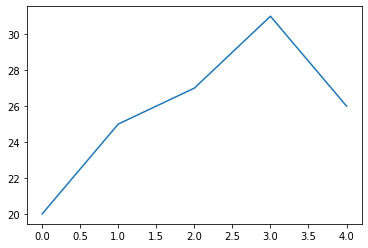

In [ ]:
df = pd.DataFrame([20, 25,27,31,26], index=[0, 1, 2, 3, 4])
df.plot(legend=False)

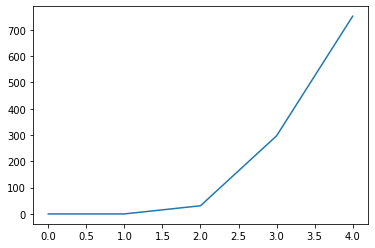

In [ ]:
df = pd.DataFrame([0, 0, 31, 297, 752])
df.plot(legend=False)